## The Law of Large Numbers

## Objectives  

  - Define the population expectation of a random variable.
  - State the law of large numbers.
  - Write code to simulate the law of large numbers.
  - Describe and counter common misconceptions of the law of large numbers.
  - Calculate the variance of a sample mean.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Always make it pretty.
plt.style.use('ggplot')

Let's focus on the simplest and possibly the most natural statistic: the *mean* of a random sample.  To be clear:

  - The **mean**, or **expectation** of a random variable or population is the theoretical quantity computed by the following integral
  
$$ E[X] = \int_{- \infty}^{\infty} t \
f_{X}(t) dt $$

The expectation is a property of a random variable, and you *must* know the distribution of the variable *completely* to compute it.  **This *never* happens in real life**, the application of computing a mean of a random variable in this way is when we hypothesize *models* of our data, we'll get to that.

  - The **sample mean** of a set of *data* (which is often postulated to result from an i.i.d sample from a random variable) is the *practical* quantity computed as the following sum
  
$$\frac{1}{n} \sum_i X_i$$

When both concepts are relevant, we often qualify the first from the second by using the term **population mean**.

**Note:** While the names betray a connection, it's important to realize that these two concepts are just *definitions*, subject to our whim.

The fundamental connection between the two concepts is given by the *law of large numbers*.

### The Law of Large Numbers.

Suppose that $X_1, X_2, \ldots$ are i.i.d. copies of a random variable $X$, that is, a random sample from a population.  

Then, for $n$ sufficiently large, the sample mean computed from a sample of size $n$ is approximately equal to the population mean:

$$ \frac{1}{n} \sum_i X_i \approx E[X] $$

**Technical Note:** The precise mathematical statement of the law of large numbers needs some more technology, namely **[convergence in probability](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_probability)**.  It essentially says that, as $n$ get large, the probability of seeing a sample mean that is different from the population mean goes to zero.

### Example:  Binomial Draws

Suppose that $X$ is a simple Bernoulli random variable, for simplicitly

$$ X \sim \text{Bernoulli}(p = 0.5) $$

In each of the plots below, we draw samples of increasing size from $X$, and compute the corresponding sample mean.  According to the law of large numbers, these paths of sample means should all limit towards the population expectation of $p = 0.5$.

In [2]:
def compute_cumlative_sample_means(sample):
    cumlative_sums = np.cumsum(sample)
    sample_sizes = np.arange(1, len(cumlative_sums) + 1)
    sample_means = cumlative_sums / sample_sizes
    return sample_sizes, sample_means

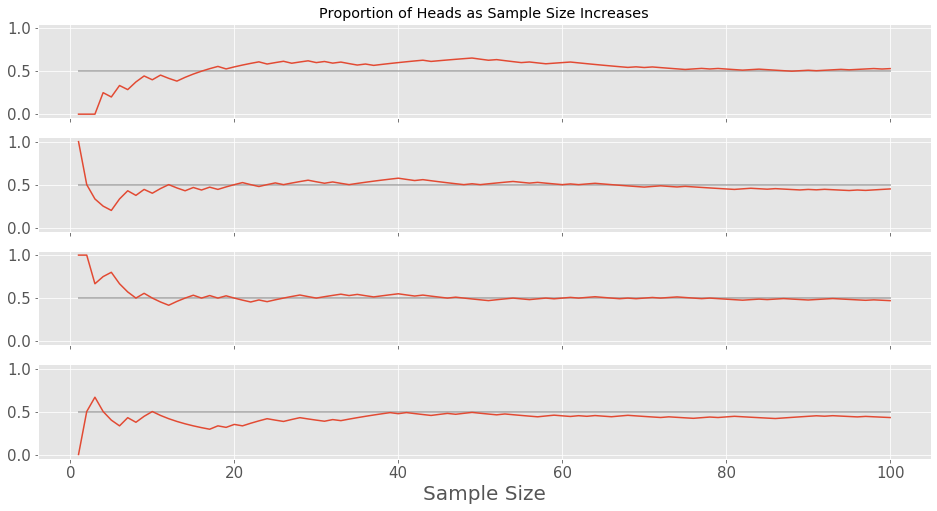

In [3]:
bernoulli = stats.binom(n=1, p=0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 8), sharex=True, sharey=True)

axs[0].set_title("Proportion of Heads as Sample Size Increases")
for idx, ax in enumerate(axs.flatten()):
    sample = bernoulli.rvs(100).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    ax.plot(sample_sizes, np.repeat(0.5, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_means)
    ax.tick_params(axis='both', which='major', labelsize=15)

    if idx == 3:
        ax.set_xlabel("Sample Size", fontsize=20)

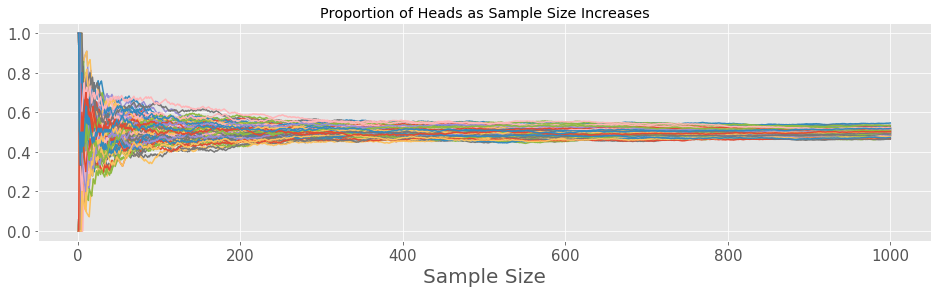

In [4]:
bernoulli = stats.binom(n=1, p=0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

ax.set_title("Proportion of Heads as Sample Size Increases")
for i in range(100):
    sample = bernoulli.rvs(1000).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    ax.plot(sample_sizes, sample_means)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel("Sample Size", fontsize=20)

### A Thing that is NOT True

The law of large numbers does **not** say that the number of $0$'s sampled becomes equal to the number of $1$'s sampled as $n$ grows, **only that the differences between them are swamped out as the denominator gets large**.

If you flip a coin an infinite number of times, you should *not* expect to get "the same number of heads as tails".  Statistics does *not* say they cancel out.  Only that the differences become less noticeable over time with respect to the magnitude of numbers involved.

In [4]:
def compute_cumlative_sample_differences(sample):
    ones_and_negative_ones = sample + (sample - 1)
    cumlative_sums = np.cumsum(ones_and_negative_ones)
    sample_sizes = np.arange(1, len(cumlative_sums) + 1)
    return sample_sizes, cumlative_sums

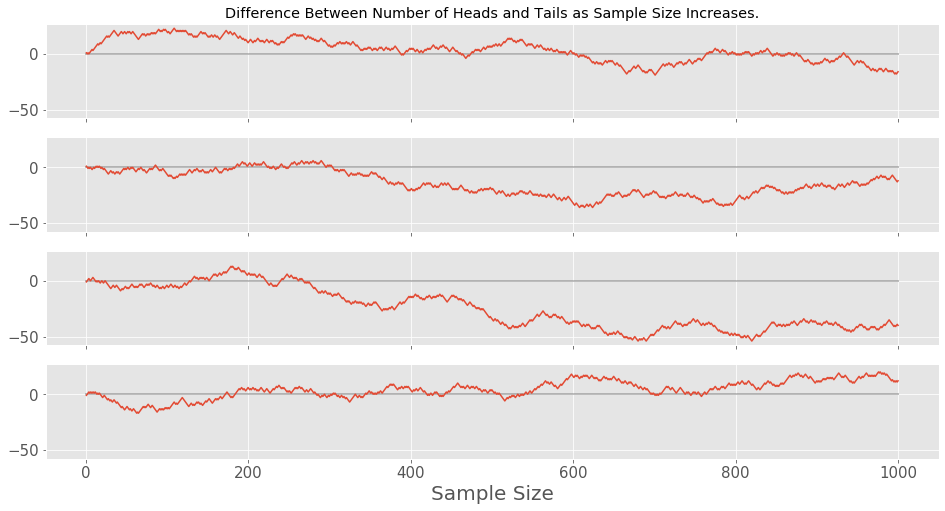

In [5]:
bernoulli = stats.binom(n=1, p=0.5)

fig, axs = plt.subplots(4, 1, figsize=(16, 8), sharex=True, sharey=True)

axs[0].set_title("Difference Between Number of Heads and Tails as Sample Size Increases.")
for idx, ax in enumerate(axs.flatten()):
    sample = bernoulli.rvs(1000).astype(np.float64)
    sample_sizes, sample_differences = compute_cumlative_sample_differences(sample)
    ax.plot(sample_sizes, np.repeat(0, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_differences)
    ax.tick_params(axis='both', which='major', labelsize=15)

    if idx == 3:
        ax.set_xlabel("Sample Size", fontsize=20)

In fact, if you plot many of these curves on one graph, you can see that in aggregate, they spread out over time

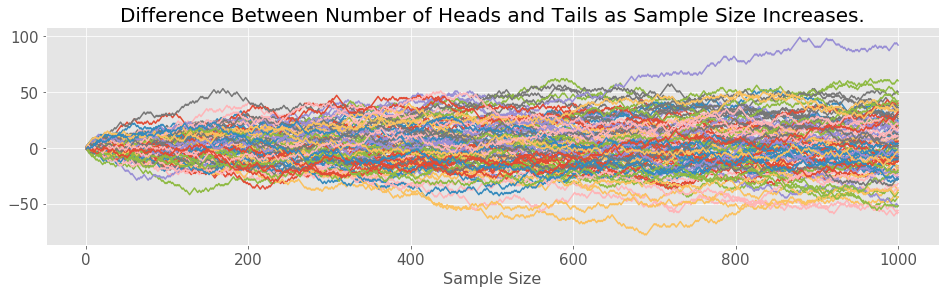

In [7]:
bernoulli = stats.binom(n=1, p=0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

ax.set_title("Difference Between Number of Heads and Tails as Sample Size Increases.",
            fontsize = 20)
for i in range(100):
    sample = bernoulli.rvs(1000).astype(np.float64)
    sample_sizes, sample_differences = compute_cumlative_sample_differences(sample)
    #ax.plot(sample_sizes, np.repeat(0, len(sample_sizes)), linewidth=2, c='grey', alpha=0.5)
    ax.plot(sample_sizes, sample_differences)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_xlabel("Sample Size", fontsize=16)

One way to interpret the law of large numbers is that the difference in the number of heads and tails are spreading out *slower* than that rate of increase of sample size.

## The Variance of the Sample Mean

The law of large numbers tells us that the sample mean is an estimate of the population mean.  A follow up question now arises: **how accurate of an estimate of the population mean is the sample mean?**

This is essentially asking: how tight is the bundle of curves here:

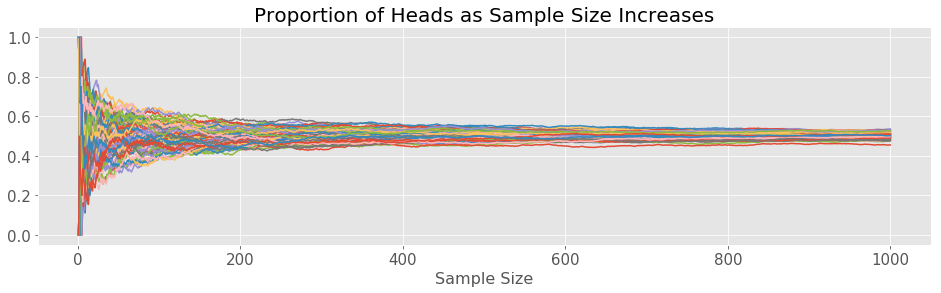

In [8]:
bernoulli = stats.binom(n=1, p=0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

ax.set_title("Proportion of Heads as Sample Size Increases",
            fontsize = 20)
ax.set_xlabel("Sample Size", fontsize=16)
for i in range(100):
    sample = bernoulli.rvs(1000).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    ax.plot(sample_sizes, sample_means)
    ax.tick_params(axis='both', which='major', labelsize=15)

This bundle has a characteristic shape:

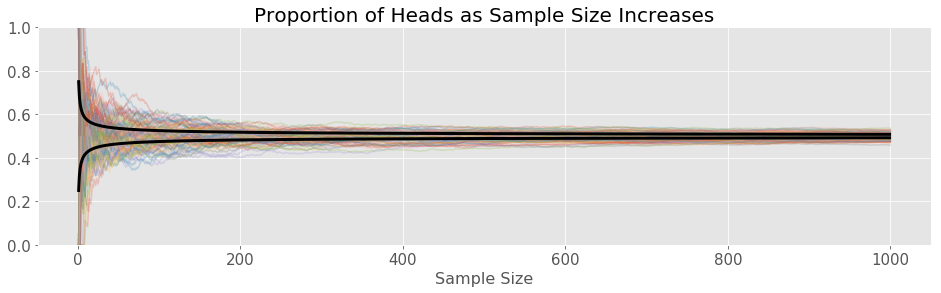

In [9]:
bernoulli = stats.binom(n=1, p=0.5)

fig, ax = plt.subplots(1, 1, figsize=(16, 4), sharex=True, sharey=True)

ax.set_title("Proportion of Heads as Sample Size Increases", 
            fontsize = 20)
for i in range(100):
    sample = bernoulli.rvs(1000).astype(np.float64)
    sample_sizes, sample_means = compute_cumlative_sample_means(sample)
    ax.plot(sample_sizes, sample_means, alpha=0.25) 
    
x = np.arange(1, 1000)
ax.plot(x, 0.5 + 0.25/np.sqrt(x), color="black", linewidth=3)
ax.plot(x, 0.5 - 0.25/np.sqrt(x), color="black", linewidth=3)

ax.set_ylim(0, 1.0)
ax.set_xlabel("Sample Size", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=15)

Recall our observations that 
  - A sample mean has less variance than the individual draws in the samples themselves.
  - The variance of a sample mean gets smaller as the size of the sample increases.
  
It's actually possible to quantify how much less variance.

This calcualtion is a classic, and is something every statistician should be able to repeat.

\begin{align*}
\DeclareMathOperator{\var}{var} 
\var  \frac{X_1 + X_2 + \cdots + X_n}{n}  
& = \frac{1}{n^2} \var (X_1 + X_2 + \cdots + X_n) \\
& = \frac{n}{n^2} \var(X) \\
& = \frac{1}{n} \var (X) 
\end{align*}

\begin{align*}
\DeclareMathOperator{\sd}{sd} 
\sd  \frac{X_1 + X_2 + \cdots + X_n}{n}  = \frac{1}{\sqrt{n}} \sd (X) 
\end{align*}


The final quantity here is called the **standard error**, it is shorthand for the more unwieldy phrase **standard deviation of the sample mean**.

**Question:** There are two assumptions needed for this calculation to work out:

1. The draws are all identically distributed.
2. The draws are all independent.

Where in the calculation above have we used these facts?